# CNN(Convolution Neural Network)
---
- 이미지, 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
    * ConvXD : 이미지 형태 그대로 입력 받아 특징을 추출하는 레이어
    * Polling : 특징맵에서 특징을 다시 추출하여 다운샘플링하는 레이어. 크기를 반으로 줄임.

In [8]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 준비 및 로딩
---

In [10]:
(x_train, y_train), (x_test, y_test)=load_data()

In [11]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_test.shape : (10000,)


In [59]:
x_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

## [2] 데이터 전처리 및 학습 형태로 변환

In [12]:
# 스케일링 => 픽셀/255.0
x_train=x_train/255.0

In [13]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 28, 28, 1)

print(f'x_train.shape : {x_train.shape}')

x_train.shape : (60000, 28, 28, 1)


In [14]:
x_test=x_test/255.0
x_test=x_test.reshape(-1, 28, 28, 1)
print(f'x_test.shape : {x_test.shape}')

x_test.shape : (10000, 28, 28, 1)


In [15]:
# 검증용 데이터 준비
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, random_state=11)

In [16]:
print(f'x_train.shape : {x_train.shape}\nx_test.shape : {x_test.shape}\nx_val.shape : {x_val.shape}')

x_train.shape : (45000, 28, 28, 1)
x_test.shape : (10000, 28, 28, 1)
x_val.shape : (15000, 28, 28, 1)


## [3] 모델 구성 및 생성
---
- 입력 형태 : 채널 정보까지 포함 3차원 (28,28, 1)
- 출력 형태 : 0 ~ 9 정수 확률값 10개 출력
- 학습 방식 : 분류 - 다중분류
- 전반부
    * 이미지 특징 추출
        - Conv2D, MaxPoll2D
- 후반부
    * 이미지 데이터 학습
        - Flatten, Dense

### [3-1] 모델 구상

In [52]:
model=Sequential()

In [53]:
# 이미지 특징 추출 Layer => 첫 번째 입력값 설정 필요
model.add(Conv2D(3, kernel_size=3, padding='same',
                input_shape=(28, 28, 1)))

In [54]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [55]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [56]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 3)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 588)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5890      
                                                                 
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
_________________________________________________________________


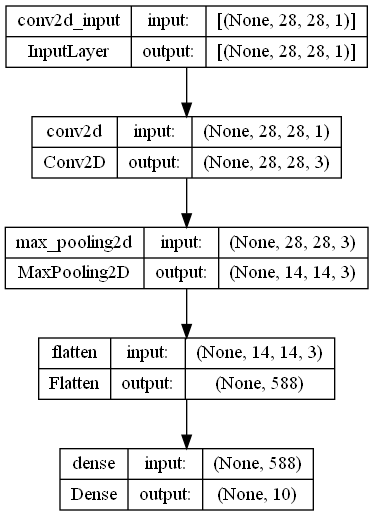

In [23]:
plot_model(model, show_shapes=True)
# 파일로 저장하고 싶으면 파라미터에 to_file='파일이름.확장자' 넣으면 됨

### [3-2] 모델 생성
---
- compile 메서드
    * loss 손실함수 => sparse_categorical_crossentropy
    * optimizer 최적화 => adam
    * metrics 평가항목 => accuracy

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

### [3-3] 모델 학습
---
- fit 메서드
    * 학습 데이터, 라벨
    * epochs 학습 횟수
    * batch_size 학습 분량
    * validation_data (검증 데이터, 검증 라벨)
    * validation_split 학습 데이터의 일부 비율 설정(ex : 0.2)
    * callback
    * verbose : 학습 진행도 화면 출력 여부 설정

In [25]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.6029 - accuracy: 0.7905
Epoch 2/30
1407/1407 [==============================] - 12s 9ms/step - loss: 0.4407 - accuracy: 0.8469
Epoch 3/30
1407/1407 [==============================] - 12s 9ms/step - loss: 0.4098 - accuracy: 0.8572
Epoch 4/30
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3924 - accuracy: 0.8633
Epoch 5/30
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3807 - accuracy: 0.8658
Epoch 6/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3701 - accuracy: 0.8705
Epoch 7/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3622 - accuracy: 0.8736
Epoch 8/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3549 - accuracy: 0.8753
Epoch 9/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3493 - accuracy: 0.8768
Epoch 10/30
1407/1407 [==============================] - 13s 9ms/step - l

### [4] 평가
---
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3681 - accuracy: 0.8694


[0.3680979311466217, 0.8694000244140625]

### [5] 예측
---
- 새로운 데이터

In [27]:
pre_y=model.predict(x_test[0].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 185ms/step


In [28]:
pre_y.round(), pre_y.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32), (1, 10))

In [29]:
y_test[0]

9

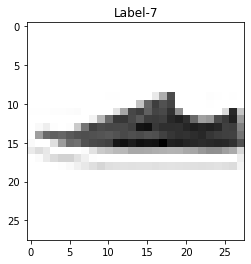

In [30]:
plt.imshow(x_val[0].reshape(28, 28), cmap='gray_r')
plt.title(f'Label-{y_val[0]}')
plt.show()

In [31]:
y_val

array([7, 6, 0, ..., 8, 3, 4], dtype=uint8)